In [261]:
import pandas as pd
df = pd.read_csv('data/score.csv', index_col='지원번호')

import matplotlib.pyplot as plt

#한글설정
plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False )

In [262]:
df.loc['3번', '학교'] = '산북고'
df.loc['7번', '학교'] = '남능고'
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,산북고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,남능고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,190,70,85,90,95,95,C#


In [263]:
group = df.groupby('학교')['키'].mean()
group

학교
남능고    189.333333
능남고    196.000000
북산고    189.000000
산북고    184.500000
Name: 키, dtype: float64

In [264]:
school = group.index
height = group.values
school, height

(Index(['남능고', '능남고', '북산고', '산북고'], dtype='object', name='학교'),
 array([189.33333333, 196.        , 189.        , 184.5       ]))

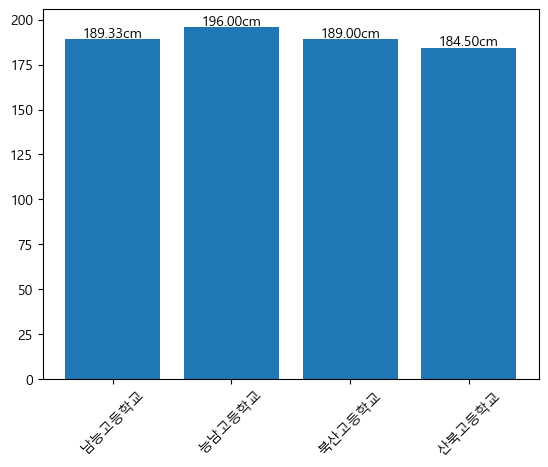

In [265]:
plt.bar(school, height)
for idx, h in enumerate(height):
    plt.text(idx, h+1, f'{h:.2f}cm', ha='center')
plt.xticks(school, [s+'등학교' for s in school], rotation=45)
plt.show()

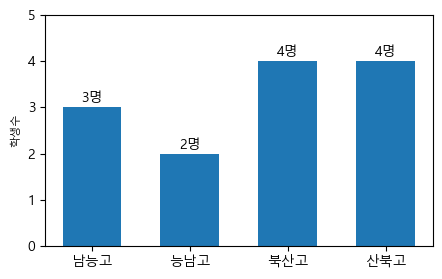

In [266]:
#학교별 학생수를 막대그래프로 출력
group = df.groupby('학교').size()
plt.figure(figsize=(5, 3))
plt.ylabel('학생수', size = 8)
plt.ylim(0, 5)
plt.bar(school, group, width=0.6)
for idx, c in enumerate(group):
    plt.text(idx, c+0.11, f'{c}명', ha='center')
plt.show()

In [267]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,산북고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,남능고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,190,70,85,90,95,95,C#


In [268]:
df['SW특기'] = df['SW특기'].str.capitalize()
df.fillna({'SW특기':'없음'}, inplace=True)
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,산북고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,남능고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,190,70,85,90,95,95,C#


In [269]:
group = df.groupby('SW특기').size()
group

SW특기
C#            3
Java          5
Javascript    1
Python        4
dtype: int64

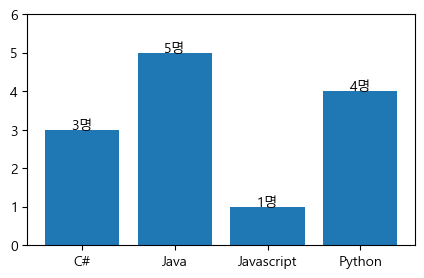

In [270]:
sw = group.index
count = group.values

plt.figure(figsize=(5, 3))
plt.bar(sw, count)
plt.ylim(0, max(count)+1)
plt.yticks([y for y in range(0, max(count)+2, 1)])
for idx, c in enumerate(count):
    plt.text(idx, c+0.02, f'{c}명', ha='center')
plt.show()

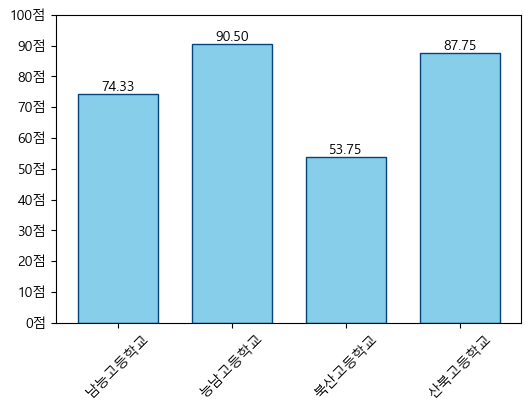

In [271]:
#학교별 평균점수 막대그래프로 출력
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)
group = df.groupby('학교')['평균'].mean()
school = group.index
avg = group.values

plt.figure(figsize=(6, 4))
plt.bar(school, avg, color='skyblue', ec='#064379', width=0.7)
#plt.ylabel('평균점수')
for idx, a in enumerate(avg):
    plt.text(idx, a+1, f'{a:.2f}', ha='center')
plt.ylim(0, 100)
yticks = [y for y in range(0, 101, 10)]
plt.yticks(yticks, [f'{y}점' for y in yticks])
plt.xticks(school, school+'등학교', rotation=45)
plt.show()

In [272]:
#학생별 키 막대그래프
import pandas as pd
df = pd.read_csv('c:/python/04.데이터시각화/data/score.csv', index_col='지원번호')

import matplotlib.pyplot as plt

#한글설정
plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False )

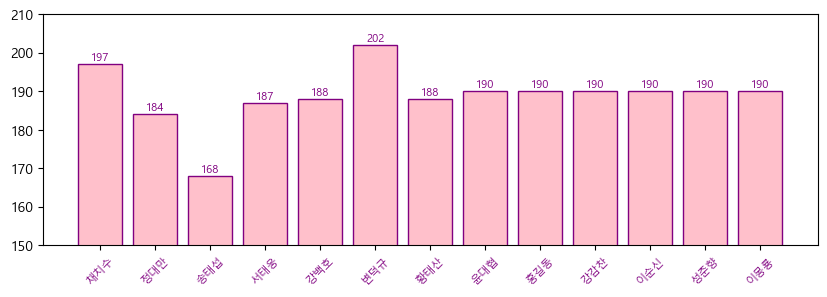

In [273]:
name = df['이름']
height = df['키']

plt.figure(figsize=(10, 3))
plt.bar(name, height, color='pink', ec='purple')
plt.ylim(150, 210)
plt.xticks(name, rotation=45, size=8, color='purple')
for idx, h in enumerate(height):
    plt.text(idx, h+1, h, ha='center', color='purple', size=8)
plt.show()


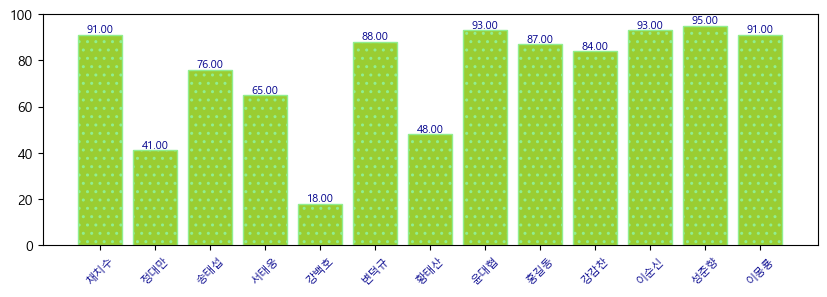

In [274]:
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)
name = df['이름']
avg = df['평균']

plt.figure(figsize=(10, 3))
plt.bar(name, avg, color='yellowgreen', ec='lightgreen', hatch='..')
plt.ylim(0, 100)
plt.xticks(name, rotation=45, size=8, color='darkblue')
for idx, h in enumerate(avg):
    plt.text(idx, h+1, f'{h:.2f}', ha='center', color='darkblue', size=8)


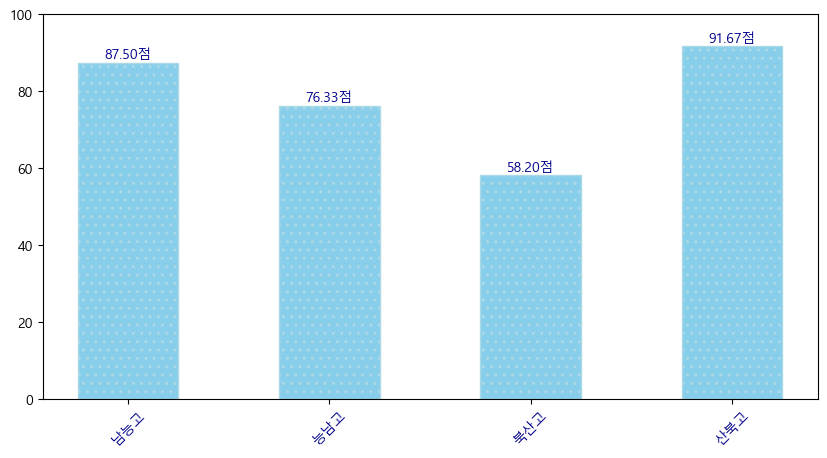

In [275]:
#학교별 평균점수 4
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)
group = df.groupby('학교')['평균'].mean()
label = group.index
values = group.values

plt.figure(figsize=(10, 5))
plt.bar(label, values, color='skyblue', ec='lightblue', hatch='..', width=0.5)
plt.ylim(0, 100)
plt.xticks(label, rotation=45, size=10, color='darkblue')
for idx, value in enumerate(values):
    plt.text(idx, value+1, f'{value:.2f}점', ha='center', color='darkblue', size=10)

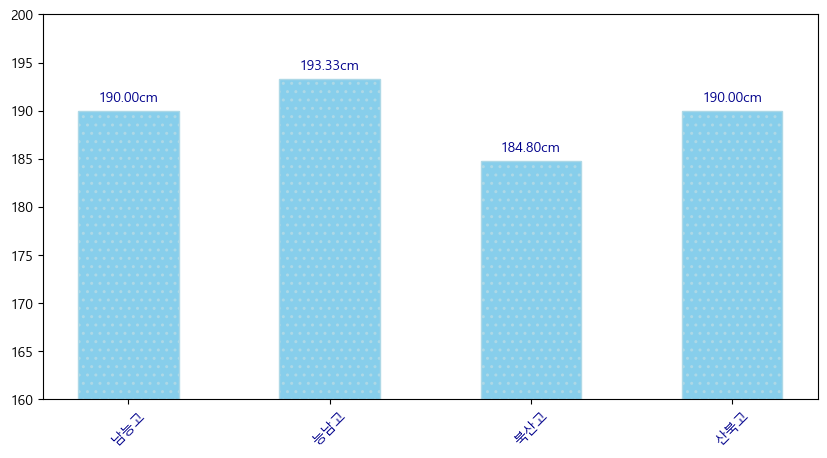

In [276]:
#학교별 평균키 3
group = df.groupby('학교')['키'].mean()
labels = group.index
values = group.values

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue', ec='lightblue', hatch='..', width=0.5)
plt.ylim(160, 200)
plt.xticks(labels, rotation=45, size=10, color='darkblue')
for idx, value in enumerate(values):
    plt.text(idx, value+1, f'{value:.2f}cm', ha='center', color='darkblue', size=10)

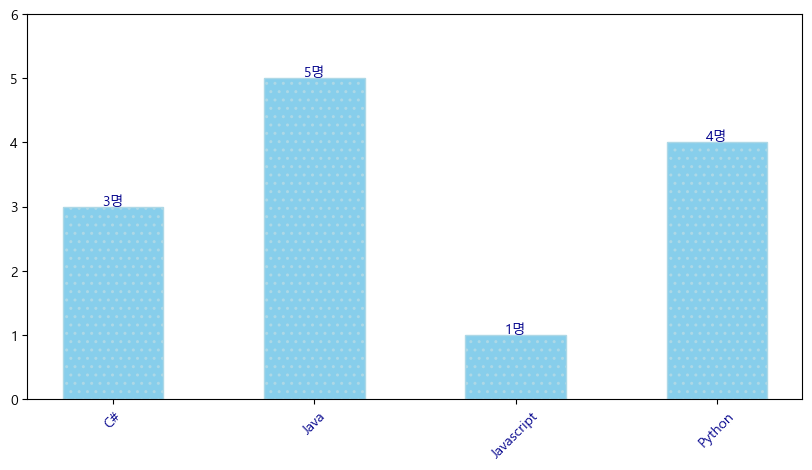

In [277]:
#sw특기별 인원수 5
df['SW특기'] = df['SW특기'].str.capitalize()
group = df.groupby('SW특기').size()

labels = group.index
values = group.values
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue', ec='lightblue', hatch='..', width=0.5)
plt.ylim(0, 6)
plt.xticks(labels, rotation=45, size=10, color='darkblue')
for idx, value in enumerate(values):
    plt.text(idx, value+0.03, f'{value}명', ha='center', color='darkblue', size=10)

In [278]:
#학생별(이름) 평균점수
enroll = pd.read_csv('data/수강.csv')
group = enroll.groupby('학생번호')['점수'].mean().to_frame("평균")
stu = pd.read_csv('data/학생.csv')
merge = stu.merge(group, how='left', on='학생번호')
merge.fillna({'평균':0}, inplace=True)
merge

,학생번호,학생이름,학생학과,학년,생년월일,지도교수,평균
0,92414029,서연우,전산,3,73/10/06,228,81.250000
1,92414033,김창덕,전산,4,73/10/26,221,82.500000
2,92514009,이지행,전자,4,73/11/16,311,77.500000
3,92514023,김형명,전자,4,73/08/29,311,70.000000
4,92454018,이원구,건축,3,74/09/30,509,90.000000
5,95454003,이재영,건축,4,76/02/06,509,81.000000
6,95414058,박혜경,전산,4,76/03/12,221,83.333333
7,96414404,김수정,전산,3,77/12/22,228,75.000000
8,96414405,홍길동,전산,3,77/12/22,228,0.000000


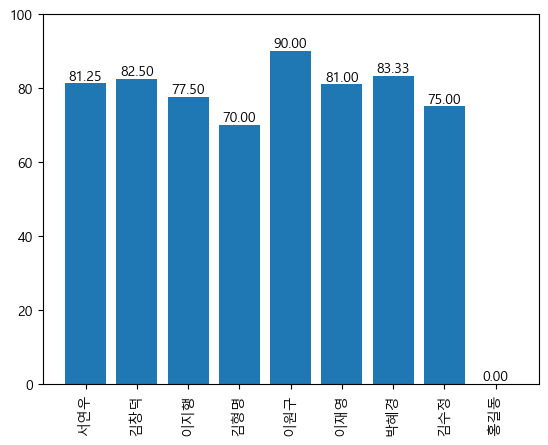

In [279]:
#학생별 평균점수 막대그래프
plt.bar(merge['학생이름'], merge['평균'])
plt.ylim(0, 100)
plt.xticks(merge['학생이름'], rotation=90)
for idx, avg in enumerate(merge['평균']):
    plt.text(idx, avg+1, f'{avg:.2f}', ha='center')


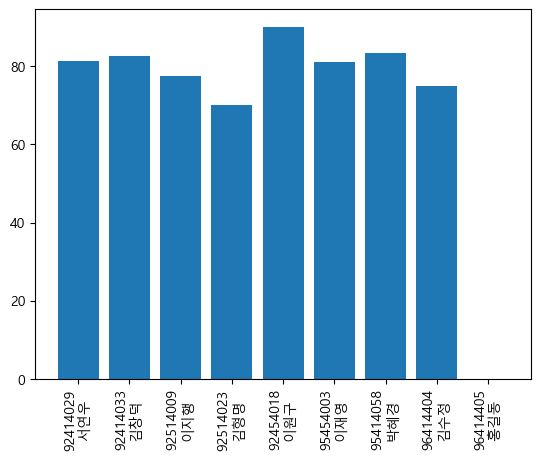

In [280]:
nos = merge['학생번호']
names = merge['학생이름']
grades = merge['평균']
plt.bar(names, grades)
xticks = [f'{nos[idx]}\n{names[idx]}' for idx in range(len(nos))]
plt.xticks(names, xticks, rotation=90)
plt.show()


In [281]:
#강좌별(이름) 평균
cou = pd.read_csv('data/강좌.csv')
cou
enroll = pd.read_csv('data/수강.csv')
group = enroll.groupby('강좌번호')['점수'].mean().to_frame()
group
merge = cou.merge(group, how='left', on='강좌번호')
merge.fillna({'점수':0}, inplace=True)
merge


,강좌번호,강좌이름,강의시수,강의실,담당교수,최대인원,점수
0,C301,파일처리론,3,506,221,100,76.333333
1,C401,데이터베이스,3,414,221,80,85.000000
2,C421,알고리즘,3,510,228,80,75.000000
3,C312,자료구조,2,510,228,100,80.000000
4,E221,논리회로,3,304,311,100,81.250000
5,A109,한국의건축문화,2,101,509,120,87.500000
6,A108,건축학개론,2,101,509,120,0.000000


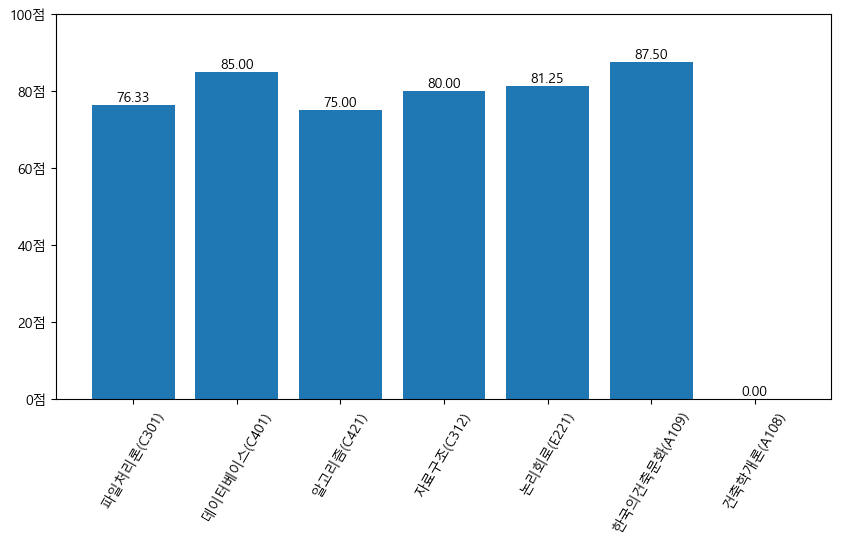

In [284]:
#강좌별(이름) 평균 막대그래프
nos = merge['강좌번호']
name = merge['강좌이름']
avg = merge['점수']

plt.figure(figsize=(10, 5))
plt.bar(name, avg)
plt.ylim(0, 100)
xticks = [f'{name[idx]}({nos[idx]})' for idx in range(len(nos))]
plt.xticks(name, xticks, rotation=60)
yticks = [y for y in range(0, 101, 20)]
plt.yticks(yticks, [f'{y}점' for y in yticks])

for idx, a in enumerate(avg):
    plt.text(idx, a+1, f'{a:.2f}', ha='center')